In [ ]:
import pandas as pd
import numpy as np

import math
import seaborn as sns


import random
from datetime import datetime, timedelta

from statsmodels.datasets import get_rdataset


from matplotlib.pyplot import subplots
import itertools
import time
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.api import OLS
import sklearn. model_selection as skm
import sklearn. linear_model as skl
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
!pip install ISLP
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn. pipeline import Pipeline
from sklearn. decomposition import PCA
from sklearn. cross_decomposition import PLSRegression
from ISLP.models import \
(Stepwise ,
sklearn_selected ,
sklearn_selection_path )
!pip install l0bnb
from l0bnb import fit_path

In [ ]:
from sklearn.cluster import \
(KMeans ,
AgglomerativeClustering )
from scipy.cluster. hierarchy import \
(dendrogram ,
cut_tree )
from ISLP.cluster import compute_linkage
from sklearn.decomposition import PCA

#**Chapter 12 question 10 **

#10. In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

#(a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables. Hint: There are a number of functions in Python that you can use to generate data. One example is the normal() method of the random() function in numpy; the uniform() method is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.


In [ ]:
n_samples = 20
n_variables = 50
n_classes = 3

data = []
labels = []
for class_id in range(n_classes):
  class_data = np.random.normal(loc=class_id * 0.65, scale=1, size=(n_samples, n_variables))
  data.append(class_data)
  labels.extend([class_id] * n_samples)

data = np.concatenate(data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (60, 50)
Labels shape: (60,)


#(b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

In [ ]:
scaler = StandardScaler(with_std =True ,
                        with_mean =True)
data_scaled = scaler.fit_transform (data)
pca_data = PCA()
pca_data.fit(data_scaled)
pca_data.mean_

array([ 1.11022302e-16,  9.25185854e-17, -3.33066907e-17,  4.44089210e-17,
       -2.75705384e-16,  3.14563190e-17,  9.25185854e-17, -4.71844785e-17,
        6.66133815e-17,  9.25185854e-18, -8.66205256e-17, -4.40388466e-16,
       -8.88178420e-17,  3.70074342e-18,  4.81096644e-17, -4.07081776e-17,
        1.08246745e-16, -7.58652400e-17,  2.58126853e-16, -1.85037171e-17,
        2.62463662e-16, -9.99200722e-17, -7.40148683e-17,  3.70074342e-17,
       -2.80331314e-16,  2.68303898e-16,  7.77156117e-17,  7.40148683e-18,
       -3.97829917e-17, -6.66133815e-17, -2.25745348e-16,  1.48029737e-17,
        1.77635684e-16,  9.80697005e-17,  9.62193288e-17,  6.98515320e-17,
       -9.62193288e-17, -1.70234197e-16,  5.27355937e-17, -3.70074342e-17,
       -1.51730480e-16,  6.84637532e-17,  1.22124533e-16,  1.11253599e-16,
       -3.42318766e-17, -2.34997207e-16, -4.07081776e-17, -7.03141249e-17,
       -3.70074342e-17, -1.85037171e-17])

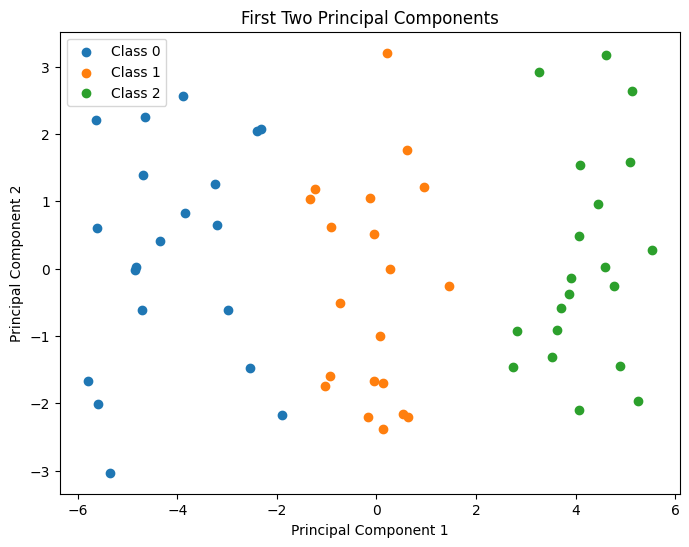

In [ ]:
principal_components = pca_data.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
for class_id in range(3):
    plt.scatter(principal_components[labels == class_id, 0],
                principal_components[labels == class_id, 1],
                label=f'Class {class_id}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First Two Principal Components')
plt.legend()
plt.show()

#(b) - Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?




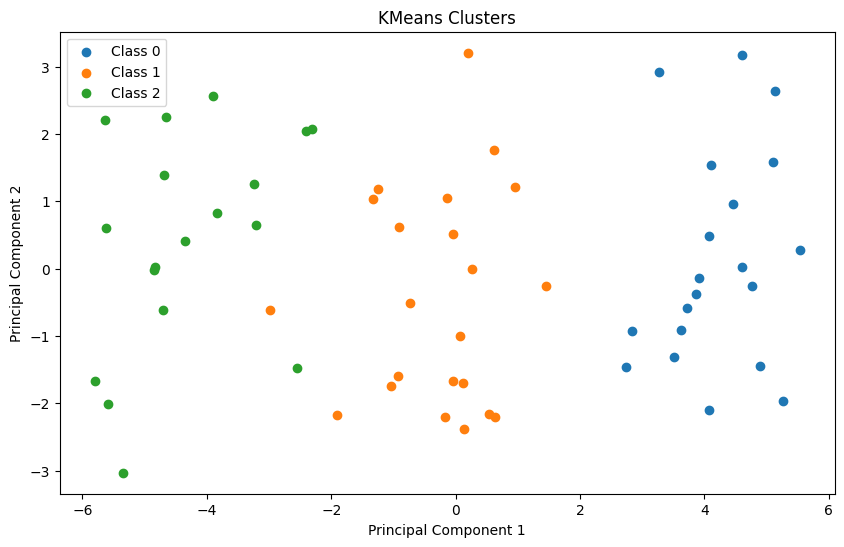

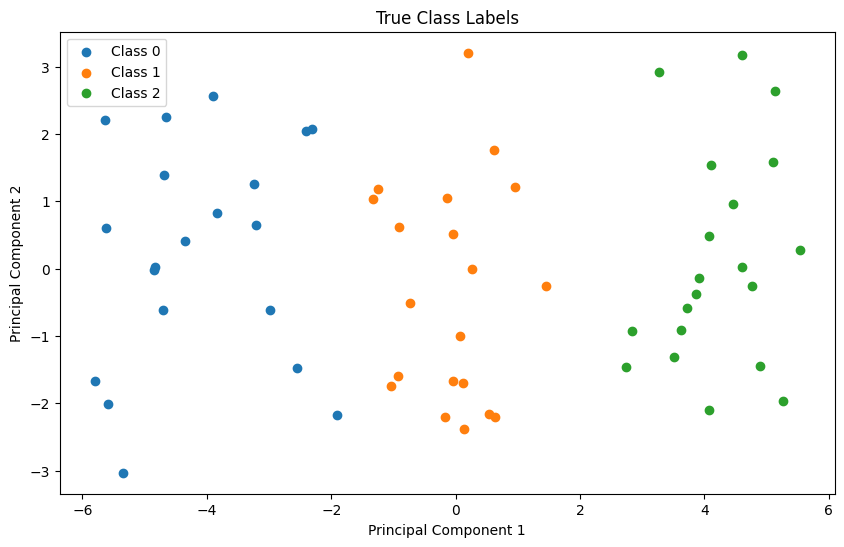

In [ ]:
k_means = KMeans(n_clusters=3, random_state=0, n_init=20)
kmeans_labels = k_means.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
for cluster_id in range(3):
    plt.scatter(principal_components[kmeans_labels == cluster_id, 0],
                principal_components[kmeans_labels == cluster_id, 1],
                label=f'Class {cluster_id}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters')
plt.legend()

plt.figure(figsize= (10,6))
for class_id in range(3):
    plt.scatter(principal_components[labels == class_id, 0],
                principal_components[labels == class_id, 1],
                label=f'Class {class_id}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('True Class Labels')
plt.legend()


#While Kmeans seemed to cluster the data well it swapped the true labels of class 1 and class 0 when compared to the true class labels. This means that it would have misidentified a large amount of data but was able perform well in seperating classes but not identifying the correct ones.

#(d) - Perform K-means clustering with K = 2. Describe your results.

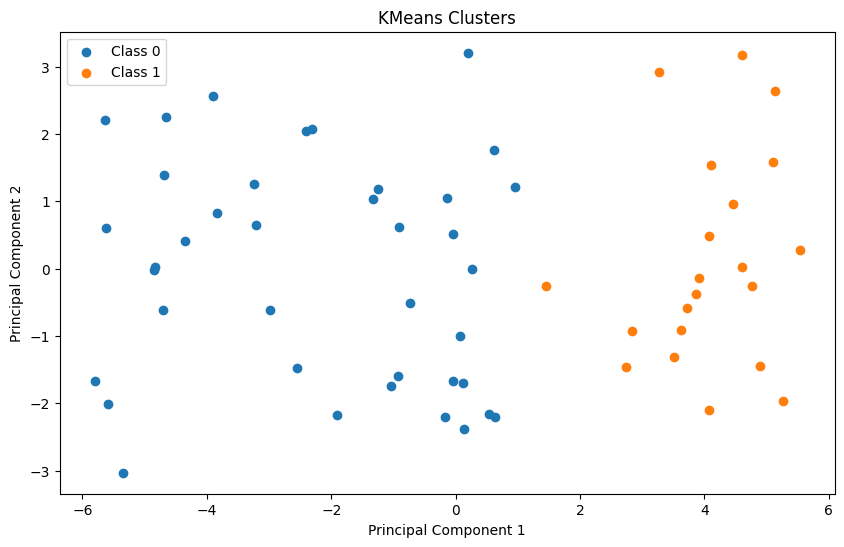

In [ ]:
k_means = KMeans(n_clusters=2, random_state=0, n_init=20)
kmeans_labels = k_means.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
for cluster_id in range(2):
    plt.scatter(principal_components[kmeans_labels == cluster_id, 0],
                principal_components[kmeans_labels == cluster_id, 1],
                label=f'Class {cluster_id}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters')
plt.legend()

#Due to the true set having 3 classes the third class dissappeared with a split of observations being absorbed into the other two classes. Here we can see more inconsistent clustering but we can see that since the middle cluster was closerf to the class 0 cluster more of it got absorbed into class 0.

#(e) - Now perform K-means clustering with K = 4, and describe your results.

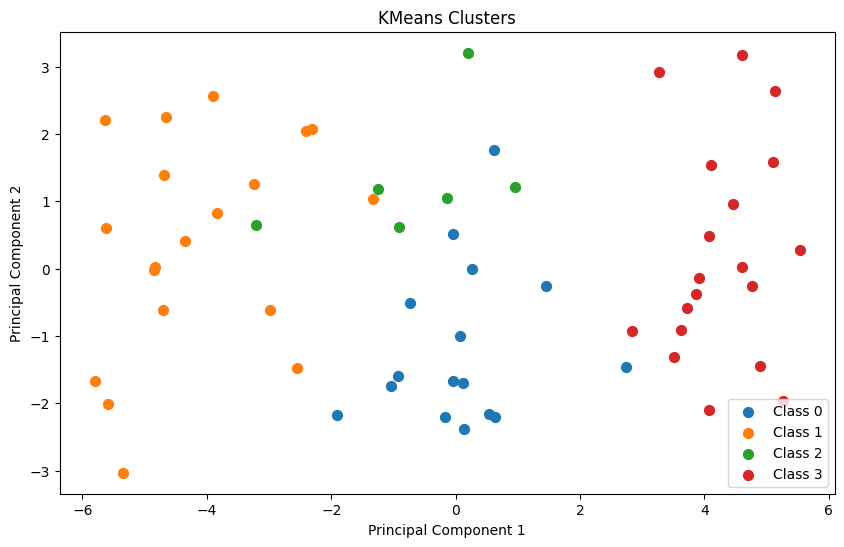

In [ ]:
k_means = KMeans(n_clusters=4, random_state=0, n_init=20)
kmeans_labels = k_means.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
for cluster_id in range(4):
    plt.scatter(principal_components[kmeans_labels == cluster_id, 0],
                principal_components[kmeans_labels == cluster_id, 1],
                label=f'Class {cluster_id}',
                s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters')
plt.legend()


#The extra class made the clustering more inconsistent with class 1 and 2 seeming more normal while 0 and 4 are flighting over the same cluster with an odd split between the two.

#(f) - Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results

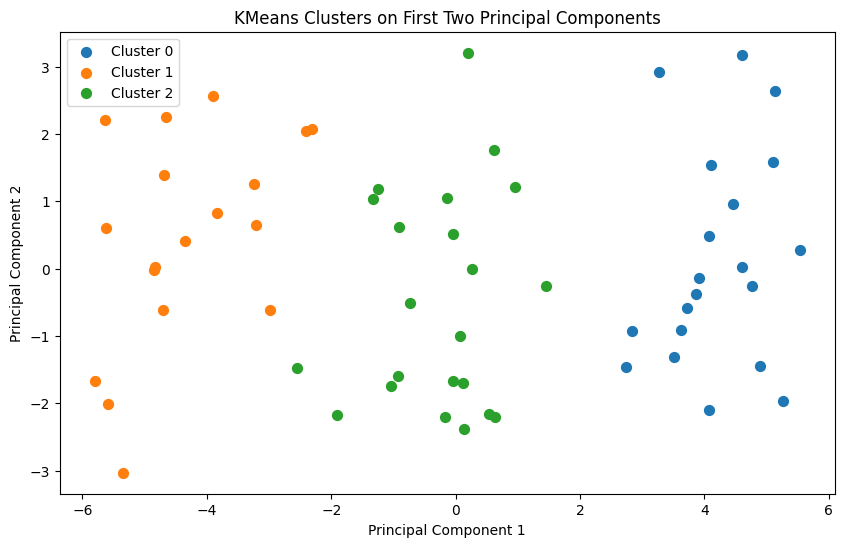

In [ ]:
principal_components_2d = principal_components[:, :2]

k_means_pca = KMeans(n_clusters=3, random_state=0, n_init=20)
kmeans_labels_pca = k_means_pca.fit_predict(principal_components_2d)

plt.figure(figsize=(10, 6))
for cluster_id in range(3):
    plt.scatter(principal_components_2d[kmeans_labels_pca == cluster_id, 0],
                principal_components_2d[kmeans_labels_pca == cluster_id, 1],
                label=f'Cluster {cluster_id}',
                s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters on First Two Principal Components')
plt.legend()
plt.show()

#By clustering the first two principal component score vectors, we are  focusing on the most important directions of variance in the data. If the first two principal components capture a significant portion of the variance and the classes are well-separated in this reduced space, then the K-means clustering should be able to identify the clusters effectively.

#If the clustering results closely match the true class labels, it indicates that the first two principal components have successfully captured the underlying structure of the data. This also suggests that dimensionality reduction using PCA can be a useful preprocessing step for clustering, especially when dealing with high-dimensional data. If there's a mismatch between the cluster assignments and true labels, it might indicate that either the first two components do not fully represent the data's structure or that K-means is not the ideal clustering algorithm for this dataset.

#(g) Using the StandardScaler() estimator, perform K-means clus- tering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

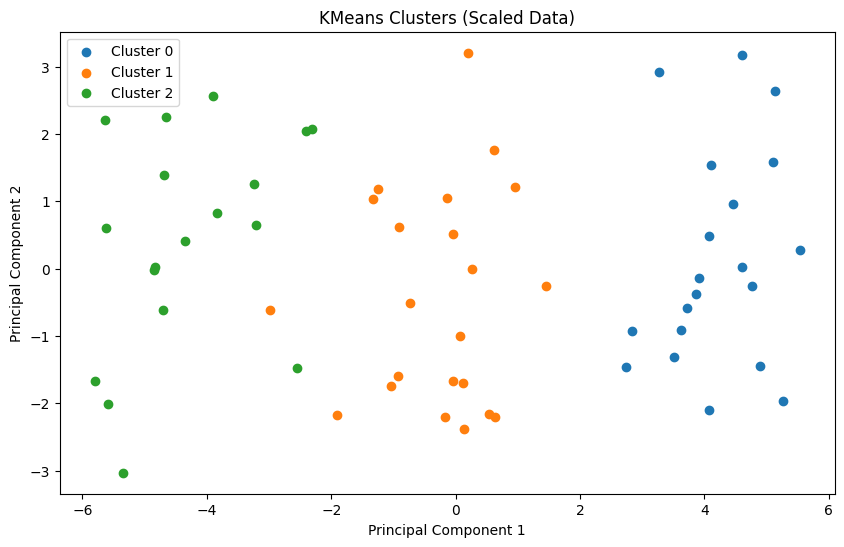

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
kmeans = KMeans(n_clusters=3, random_state=0, n_init=20)
kmeans_labels = kmeans.fit_predict(data_scaled)
plt.figure(figsize=(10, 6))
for cluster_id in range(3):
    plt.scatter(principal_components[kmeans_labels == cluster_id, 0],
                principal_components[kmeans_labels == cluster_id, 1],
                label=f'Cluster {cluster_id}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters (Scaled Data)')
plt.legend()
plt.show()

#By scaling the data using StandardScaler, we ensure that each variable has a standard deviation of 1, preventing variables with larger scales from disproportionately influencing the distance calculations in K-means clustering. This often leads to improved cluster quality and more accurate results compared to clustering on unscaled data.

#**Part II**

In [ ]:
fx = pd.read_csv('FXmonthly.csv')
sp500 = pd.read_csv('sp500.csv')

#Translating prices into returns for fx data

In [ ]:
fx_returns = (fx.iloc[1:, :] - fx.iloc[:-1, :]) / fx.iloc[:-1, :]
fx_returns.reset_index(drop=True, inplace=True)

print(fx_returns)


     exalus  exbzus  excaus  exchus  exdnus  exhkus  exinus  exjpus  exkous  \
0       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
115     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
116     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
117     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
118     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
119     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

     exmaus  ...  exsius  exsfus  exslus  exsdus  e

#1. Discuss correlation amongst variables of fx. How does this relate to the applicability of PCA?

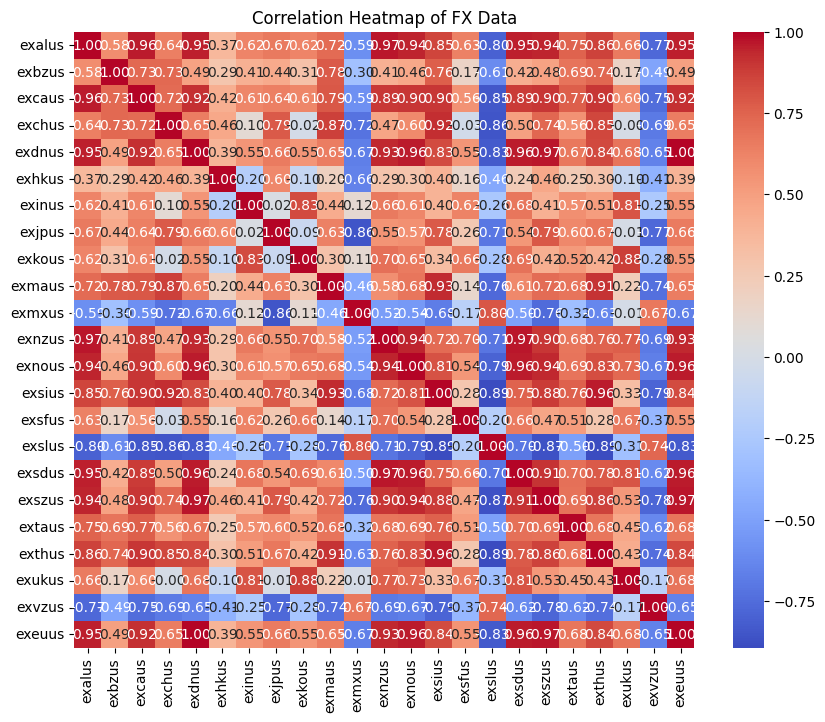

In [ ]:
correlation_matrix = fx.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of FX Data')
plt.show()



#There are many strong negative an positive correlations in the heatmap, which suggests that PCA is likely to be applicable and effective in reducing the dimensionality of the data.


#2. Fit, plot, and interpret principal components (PCs)



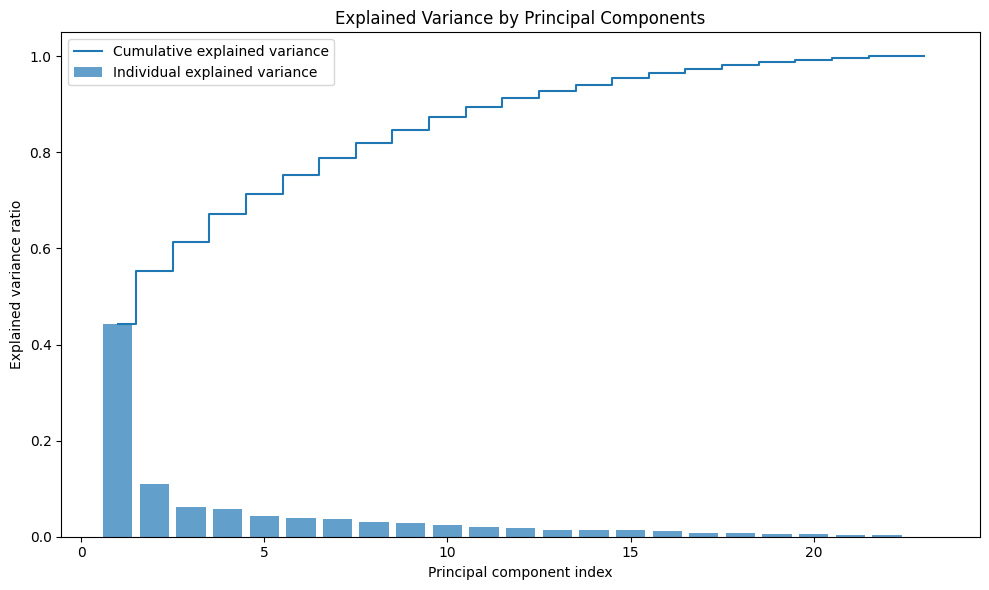

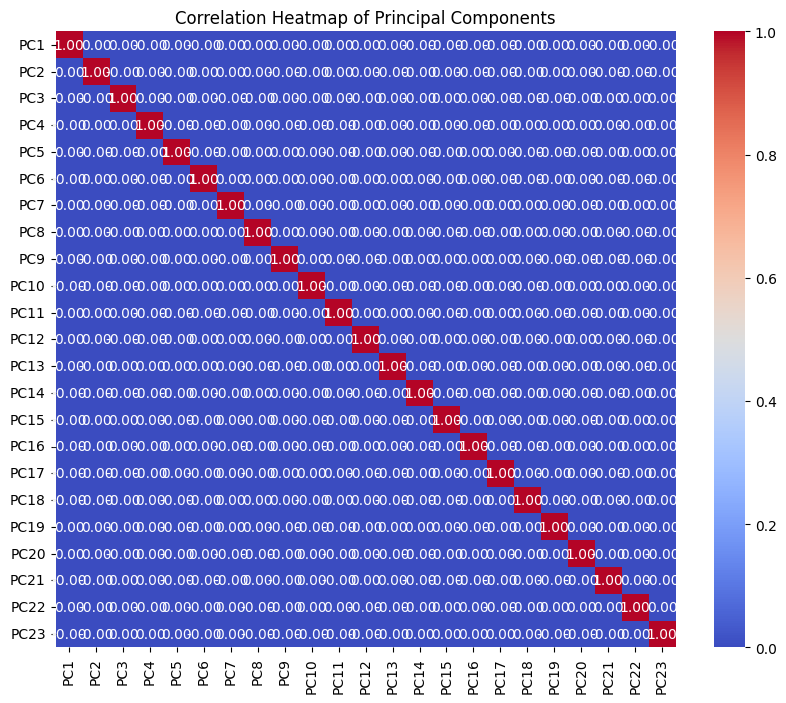


Loadings:
        exalus    exbzus    excaus    exchus    exdnus    exhkus    exinus  \
PC1   0.275463  0.158535  0.221442  0.062782  0.275591  0.033654  0.203542   
PC2  -0.144796 -0.329430 -0.179288  0.079985  0.205398  0.261870 -0.233386   
PC3  -0.122285 -0.030565 -0.221280  0.128067 -0.111448 -0.416356  0.193629   
PC4  -0.021782  0.289838 -0.019699  0.636050  0.030158  0.051164 -0.051118   
PC5   0.007801  0.156807  0.105703 -0.297181 -0.162068  0.443655  0.267706   
PC6   0.032159  0.101121  0.159342 -0.402505  0.073989 -0.050377 -0.157220   
PC7   0.044289  0.058580  0.277029  0.045081 -0.092063  0.576631  0.050373   
PC8  -0.163390 -0.330407 -0.041466 -0.031450  0.051940 -0.042685  0.221378   
PC9  -0.142906 -0.222814 -0.298417 -0.310165  0.078816  0.072280  0.259238   
PC10 -0.008026  0.120329 -0.055762 -0.286746  0.024497 -0.118111 -0.151010   
PC11  0.244114 -0.418273  0.030605  0.034359 -0.134317 -0.005663 -0.271585   
PC12 -0.174928 -0.095436 -0.345923  0.191989 -0.06837

In [ ]:

scaler = StandardScaler()
fx_returns = fx.pct_change().dropna()
fx_scaled = scaler.fit_transform(fx_returns)

pca = PCA()
pca.fit(fx_scaled)

principal_components = pca.transform(fx_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7,
        align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio),
         where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

principal_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(principal_components.shape[1])])
plt.figure(figsize=(10, 8))
sns.heatmap(principal_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Principal Components')
plt.show()

loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=fx_returns.columns, index=[f"PC{i+1}" for i in range(loadings.shape[0])])
print("\nLoadings:")
print(loadings_df)

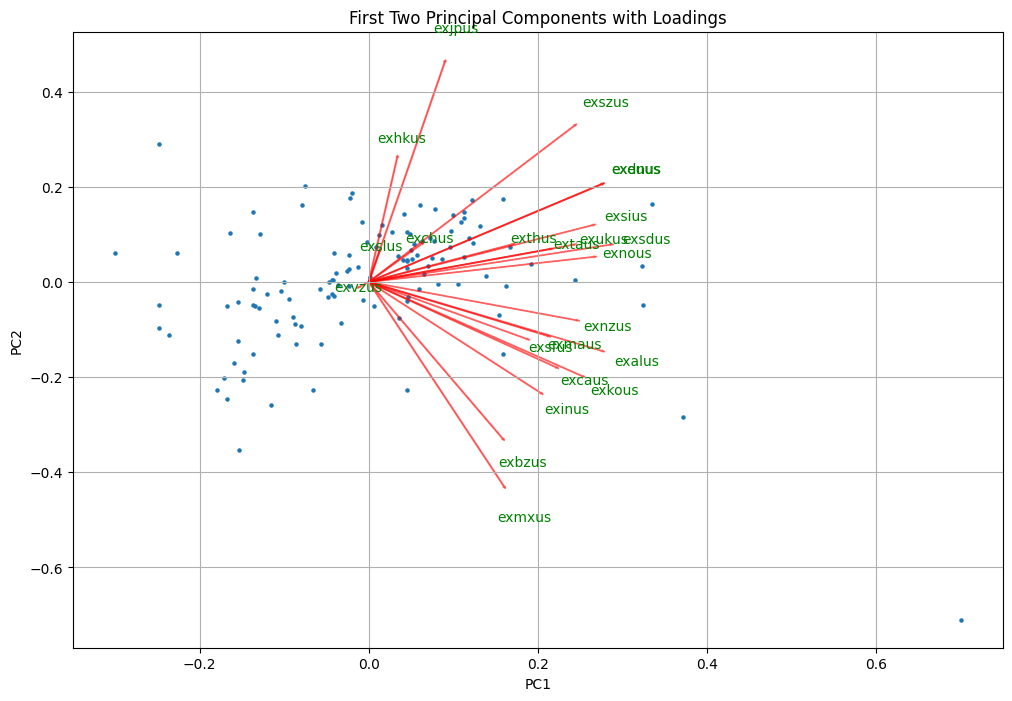

In [ ]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(12, 8))
myplot(principal_components[:,0:2],np.transpose(pca.components_[0:2, :]),labels=fx_returns.columns)
plt.title('First Two Principal Components with Loadings')
plt.show()

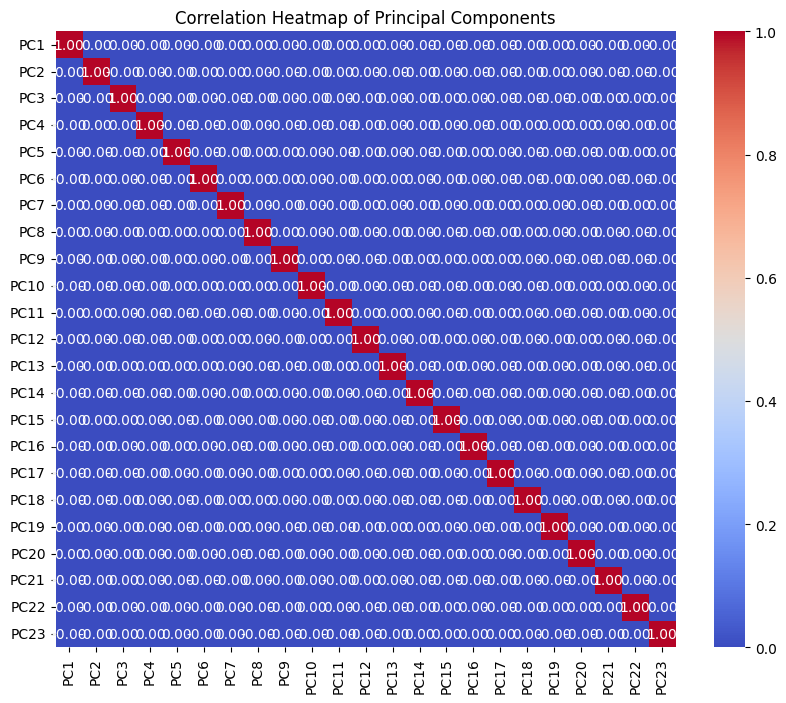


Loadings:
        exalus    exbzus    excaus    exchus    exdnus    exhkus    exinus  \
PC1   0.275463  0.158535  0.221442  0.062782  0.275591  0.033654  0.203542   
PC2  -0.144796 -0.329430 -0.179288  0.079985  0.205398  0.261870 -0.233386   
PC3  -0.122285 -0.030565 -0.221280  0.128067 -0.111448 -0.416356  0.193629   
PC4  -0.021782  0.289838 -0.019699  0.636050  0.030158  0.051164 -0.051118   
PC5   0.007801  0.156807  0.105703 -0.297181 -0.162068  0.443655  0.267706   
PC6   0.032159  0.101121  0.159342 -0.402505  0.073989 -0.050377 -0.157220   
PC7   0.044289  0.058580  0.277029  0.045081 -0.092063  0.576631  0.050373   
PC8  -0.163390 -0.330407 -0.041466 -0.031450  0.051940 -0.042685  0.221378   
PC9  -0.142906 -0.222814 -0.298417 -0.310165  0.078816  0.072280  0.259238   
PC10 -0.008026  0.120329 -0.055762 -0.286746  0.024497 -0.118111 -0.151010   
PC11  0.244114 -0.418273  0.030605  0.034359 -0.134317 -0.005663 -0.271585   
PC12 -0.174928 -0.095436 -0.345923  0.191989 -0.06837

In [ ]:
principal_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(principal_components.shape[1])])
plt.figure(figsize=(10, 8))
sns.heatmap(principal_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Principal Components')
plt.show()

loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=fx_returns.columns, index=[f"PC{i+1}" for i in range(loadings.shape[0])])
print("\nLoadings:")
print(loadings_df)

In [ ]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=fx_returns.columns, index=[f"PC{i+1}" for i in range(loadings.shape[0])])
print("\nLoadings:")
print(loadings_df)


Loadings:
        exalus    exbzus    excaus    exchus    exdnus    exhkus    exinus  \
PC1   0.275463  0.158535  0.221442  0.062782  0.275591  0.033654  0.203542   
PC2  -0.144796 -0.329430 -0.179288  0.079985  0.205398  0.261870 -0.233386   
PC3  -0.122285 -0.030565 -0.221280  0.128067 -0.111448 -0.416356  0.193629   
PC4  -0.021782  0.289838 -0.019699  0.636050  0.030158  0.051164 -0.051118   
PC5   0.007801  0.156807  0.105703 -0.297181 -0.162068  0.443655  0.267706   
PC6   0.032159  0.101121  0.159342 -0.402505  0.073989 -0.050377 -0.157220   
PC7   0.044289  0.058580  0.277029  0.045081 -0.092063  0.576631  0.050373   
PC8  -0.163390 -0.330407 -0.041466 -0.031450  0.051940 -0.042685  0.221378   
PC9  -0.142906 -0.222814 -0.298417 -0.310165  0.078816  0.072280  0.259238   
PC10 -0.008026  0.120329 -0.055762 -0.286746  0.024497 -0.118111 -0.151010   
PC11  0.244114 -0.418273  0.030605  0.034359 -0.134317 -0.005663 -0.271585   
PC12 -0.174928 -0.095436 -0.345923  0.191989 -0.06837

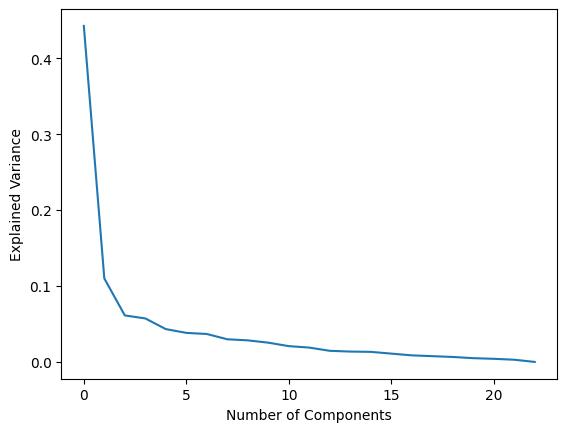

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

In [ ]:
important_pc = []
for i, ratio in enumerate(explained_variance_ratio):
    if ratio >= 0.05:
        important_pc.append(i)
    else:
        break

print("Important principal components:", important_pc)



Important principal components: [0, 1, 2, 3]


# PC1 represents the overall movement of the USD against other currencies. It captures the common trend or variation among most of the currency pairs in the dataset. It also has high loadings for most of the currency pairs, especially those related to the USD. This indicates that the USD's strength or weakness is the dominant factor driving this principal component. A positive value for PC1 suggests a strong USD, while a negative value suggests a weak USD.

#PC2 captures the relative movement between specific currency pairs and the USD. It represents a more localized variation in the data. PC2 has high loadings for some specific currency pairs. This indicates that these currencies have a distinct relationship with the USD, which is not fully captured by PC1. PC2 might also reflect specific economic factors affecting these currency pairs. For example, it could be related to interest rate differentials, trade balances, or political events impacting these currencies.

#PC3 may be capturing a specific movement of the USD against a basket of other currencies. If, for example, some currencies are correlated with PC3 negatively and some are correlated with it positively, it may indicate diversification, the movements that diversify a portfolio of various currencies.

#3. Regress SP500 returns onto currency movement PCs, using both "glm on first K" and lasso techniques. Use the results to add to your factor interpretation.

In [ ]:
x = principal_df[['PC1', 'PC2', 'PC3']]
y = sp500['sp500']
model_glm = smf.ols('y ~ x', data=pd.concat([y, x], axis=1)).fit()


print(model_glm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     20.22
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           1.36e-10
Time:                        22:29:24   Log-Likelihood:                 219.81
No. Observations:                 119   AIC:                            -431.6
Df Residuals:                     115   BIC:                            -420.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.004      0.125      0.9

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

alphas = np.logspace(-4, -0.1, 10)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
scaler = StandardScaler()
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid={'alpha': alphas},
                        scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(x_train, y_train)
best_lasso = lasso_cv.best_estimator_
lasso_pred = best_lasso.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print("\nLasso Regression:")
print("Best alpha:", lasso_cv.best_params_['alpha'])
print("Test MSE:", lasso_mse)

best_lasso_coefficients = best_lasso.coef_
predictor_names = x_train.columns
coefficients_original_df = pd.DataFrame({'Predictor': predictor_names, 'Coefficient': best_lasso_coefficients})
print("\nCoefficients of the best Lasso Regression model:")
print(coefficients_original_df)

r2 = r2_score(y_test, lasso_pred)
print("R-squared:", r2)



Lasso Regression:
Best alpha: 0.0007356422544596414
Test MSE: 0.0019365924608896643

Coefficients of the best Lasso Regression model:
  Predictor  Coefficient
0       PC1    -0.005116
1       PC2     0.011141
2       PC3     0.007843
R-squared: 0.17089927211008782


#USD strength (PC1) is a primary positive driver of SP500 returns. A stronger USD tends to be associated with higher stock market performance.Specific relative currency movements (PC2) can negatively impact SP500 returns. Certain currency relationships, likely related to trade or investment flows, might have an adverse effect on the stock market. Other currency movements (PC3) have less predictive power for SP500 returns. These movements might be less relevant to the US stock market or have offsetting effects. In essence, the analysis suggests that while a strong USD generally benefits the US stock market, specific currency relationships should also be considered, as they can have a negative influence.




#4. Fit lasso to the original covariates and describe how it differs from the principal components regression here

In [ ]:
x = fx_returns
y = sp500['sp500']

alphas = np.logspace(-4, -0.1, 10)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
scaler = StandardScaler()
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid={'alpha': alphas},
                        scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(x_train, y_train)
best_lasso = lasso_cv.best_estimator_
lasso_pred = best_lasso.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print("\nLasso Regression:")
print("Best alpha:", lasso_cv.best_params_['alpha'])
print("Test MSE:", lasso_mse)

best_lasso_coefficients = best_lasso.coef_
predictor_names = x_train.columns
coefficients_original_df = pd.DataFrame({'Predictor': predictor_names, 'Coefficient': best_lasso_coefficients})
print("\nCoefficients of the best Lasso Regression model:")
print(coefficients_original_df)

r2 = r2_score(y_test, lasso_pred)
print("R-squared:", r2)



Lasso Regression:
Best alpha: 0.0001
Test MSE: 0.0019309601390201335

Coefficients of the best Lasso Regression model:
   Predictor  Coefficient
0     exalus    -0.053458
1     exbzus    -0.197050
2     excaus    -0.000000
3     exchus     0.000000
4     exdnus     0.000000
5     exhkus    -0.000000
6     exinus    -0.000000
7     exjpus     0.002636
8     exkous    -0.000000
9     exmaus    -0.000000
10    exmxus    -0.443336
11    exnzus     0.000000
12    exnous     0.000000
13    exsius     0.000000
14    exsfus    -0.122190
15    exslus     0.000000
16    exsdus    -0.088526
17    exszus     0.000000
18    extaus     0.000000
19    exthus     0.000000
20    exukus     0.000000
21    exvzus    -0.062295
22    exeuus     0.000000
R-squared: 0.17331060141971089


#Specific currency pairs (e.g., EUR/USD, JPY/USD) directly influence SP500 returns, often with opposing effects. Most individual currency movements have minimal direct impact on the SP500. this highlights the importance of specific currency relationships, rather than just overall USD strength, for predicting SP500 performance.



#5. Bonus: Fit PLS and compare to PCA.






In [ ]:
from sklearn.cross_decomposition import PLSRegression


In [ ]:
x = principal_df[['PC1', 'PC2', 'PC3']]
y = sp500['sp500']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
pls_model = PLSRegression(n_components=3)
pls_model.fit(x_train, y_train)
y_pred_pls = pls_model.predict(x_test)
mse_pls = mean_squared_error(y_test, y_pred_pls)
r2_pls = r2_score(y_test, y_pred_pls)

print("Mean Squared Error (PLS):", mse_pls)
print("R-squared (PLS):", r2_pls)
print("PLS Coefficients:", pls_model.coef_)


Mean Squared Error (PLS): 0.0019364428249352963
R-squared (PLS): 0.17096333477747427
PLS Coefficients: [[-0.00516668  0.01139791  0.00830237]]


#PLS is a supervising learning model while PCA is an unsupervised model. PCA reduced dimensionlity and looked for common trends within the covariates then onto the SP500 returns. With a focus on catching underlying patterns in currency movements. PLS directly considered the relationship between each currency movement and the SP500 movements. If i was more interested in predicting trends or movements in the SP500 I would most likely have chosen thhe PLS model as that is its focus and goal and seems to have a better performance there. Howeeer PCA did give a better analysis of the trends in the data and the dimensionality reductions made it easier to understrand the broader trends within currency movements as a whole.